In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
series = pd.read_csv('daily-minimum-temperatures.csv')
series

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
len(series)

3650

<Axes: >

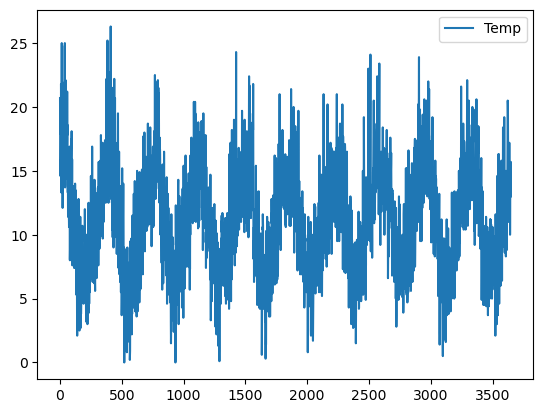

In [5]:
# line plot
series.plot()

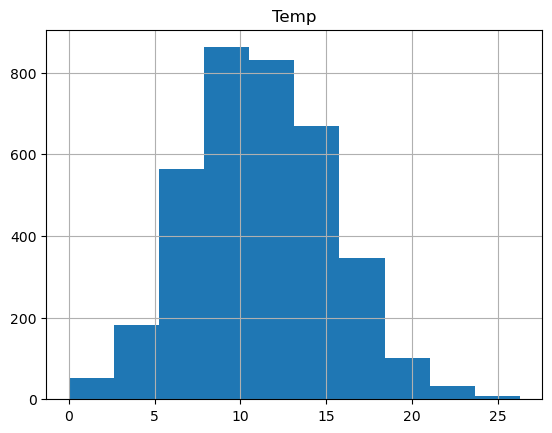

In [6]:
# create a histogram plot
from matplotlib import pyplot
series.hist()
pyplot.show()

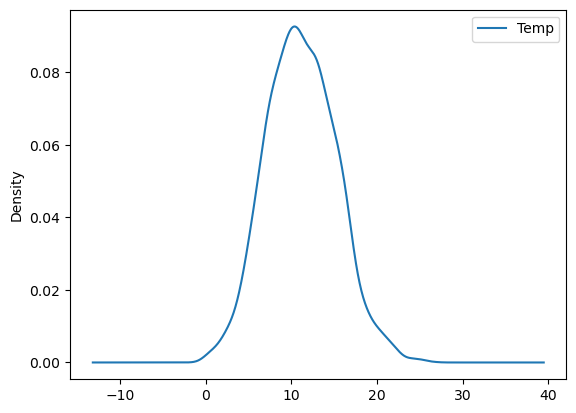

In [7]:
# create a density plot
from matplotlib import pyplot
series.plot(kind='kde')
pyplot.show()

In [13]:
# create a boxplot of yearly data
# days vs each year
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True)
groups = series.groupby(Grouper(freq='A'))
years = pd.DataFrame()


In [16]:
for name, group in groups:
    years[name.year] = pd.Series(group.values.flatten())    
years

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,20.7,17.0,18.4,19.5,13.3,12.9,12.3,15.3,14.3,14.8
1,17.9,15.0,15.0,17.1,15.2,13.8,13.8,14.3,17.4,13.3
2,18.8,13.5,10.9,17.1,13.1,10.6,15.3,13.5,18.5,15.6
3,14.6,15.2,11.4,12.0,12.7,12.6,15.6,15.0,16.8,14.5
4,15.8,13.0,14.8,11.0,14.6,13.7,16.2,13.6,11.5,14.3
...,...,...,...,...,...,...,...,...,...,...
360,15.5,15.3,13.9,12.2,11.5,14.6,16.2,9.5,13.3,14.0
361,13.3,16.3,11.1,12.0,10.8,14.2,14.2,12.9,11.7,13.6
362,15.6,15.8,16.1,12.6,12.0,13.2,14.3,12.9,10.4,13.5
363,15.2,17.7,20.4,16.0,16.3,11.7,13.3,14.8,14.4,15.7


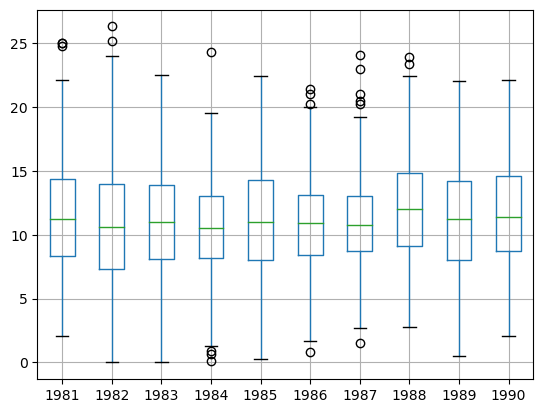

In [17]:
years.boxplot()
pyplot.show()

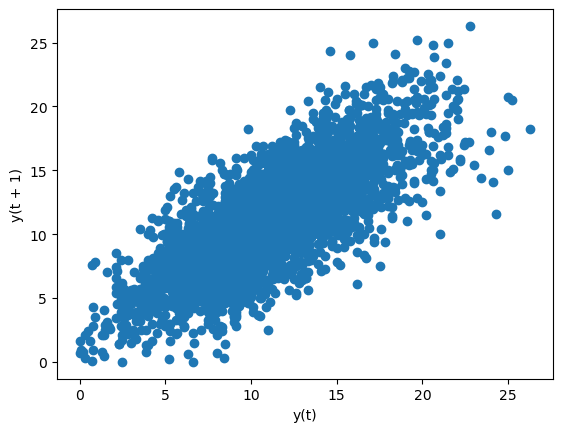

In [18]:
#### Lag plot
# create a scatter plot
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

<Figure size 4000x1000 with 0 Axes>

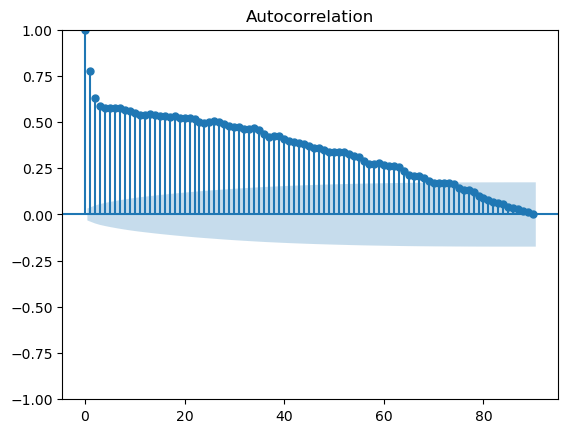

In [19]:
# create an autocorrelation plot
from matplotlib import pyplot
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True)
plot_acf(series,lags=90)
pyplot.show()

# FORECASTING

In [20]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',20)


<Axes: >

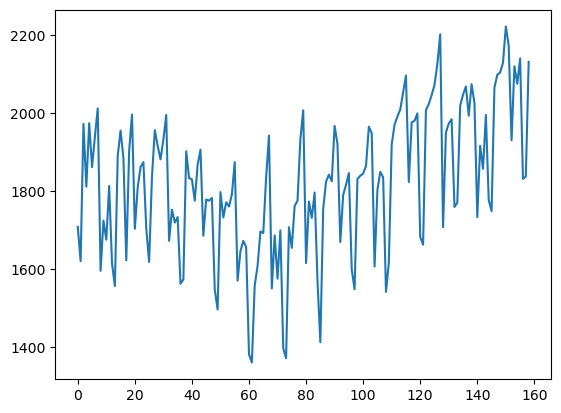

In [22]:
Walmart = pd.read_csv("footfalls.csv")
Walmart.shape
list(Walmart)
Walmart.Footfalls.plot()

In [24]:
Walmart.head()


,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
Walmart.Month

0      Jan-91
1      Feb-91
2      Mar-91
3      Apr-91
4      May-91
        ...  
154    Nov-03
155    Dec-03
156    Jan-04
157    Feb-04
158    Mar-04
Name: Month, Length: 159, dtype: object

In [26]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01


In [27]:
Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction

Walmart.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991


<Axes: xlabel='month', ylabel='year'>

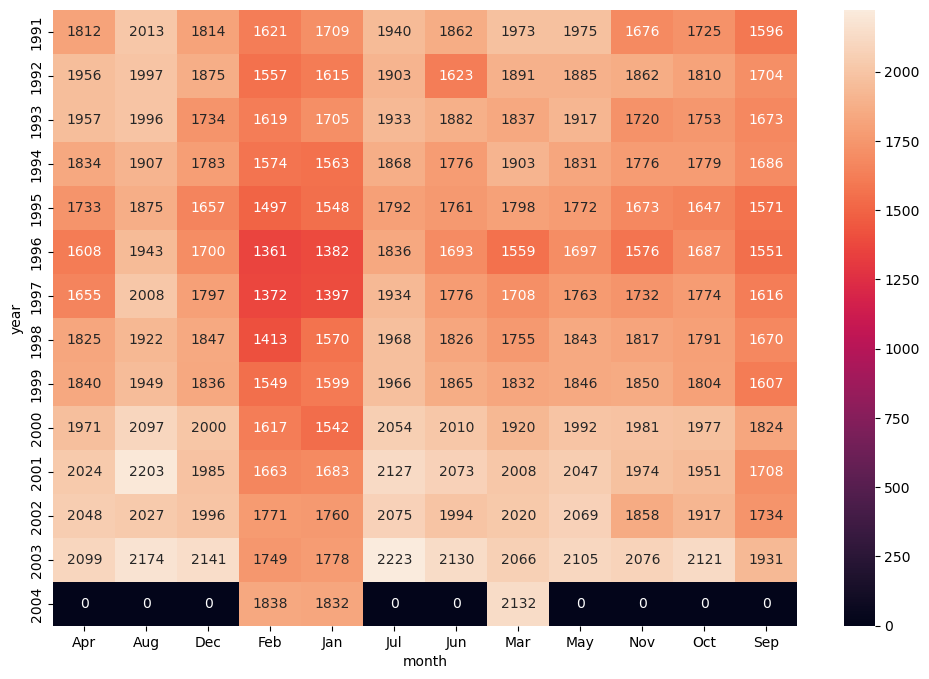

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Walmart,values="Footfalls",index="year",columns="month",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<Axes: xlabel='year', ylabel='Footfalls'>

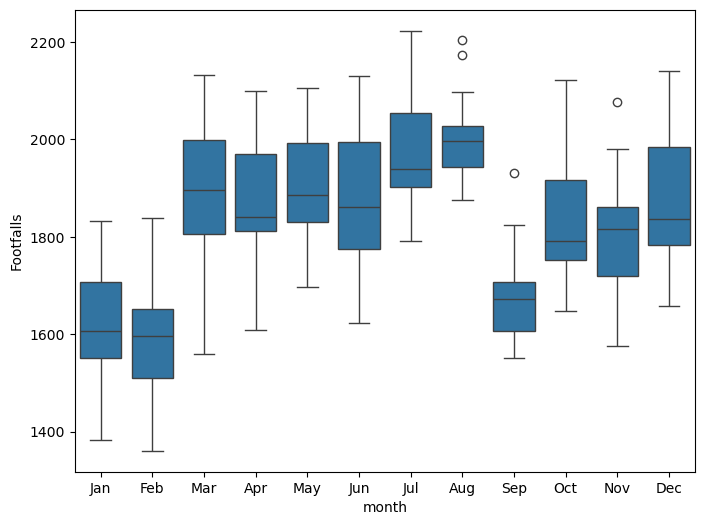

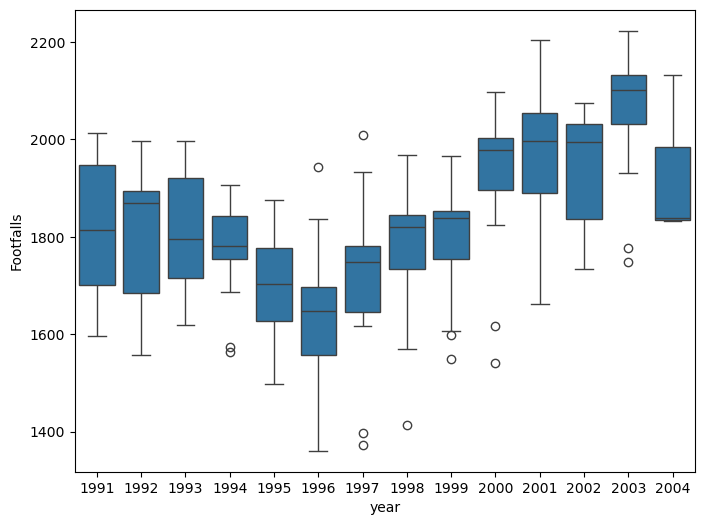

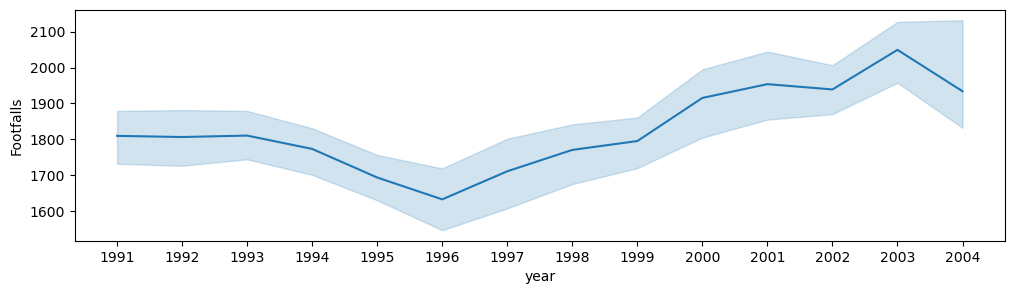

In [29]:
# Boxplot for ever
plt.figure(figsize=(8,6))
sns.boxplot(x="month",y="Footfalls",data=Walmart)

plt.figure(figsize=(8,6))
sns.boxplot(x="year",y="Footfalls",data=Walmart)

plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=Walmart)


In [30]:
# Splitting data
Walmart.shape
Train = Walmart.head(147)
Test = Walmart.tail(12)

In [31]:
import statsmodels.formula.api as smf 
# linear model
linear_model = smf.ols('Footfalls~t',data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462546

In [32]:
#Exponential
Exp = smf.ols('log_footfalls~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


217.05263569547674

In [33]:
#Quadratic 
Quad = smf.ols('Footfalls~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356484

In [34]:
#Additive seasonality 
add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea


264.66439005687806

In [35]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad


50.607245841700674

In [36]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.19703252663464

In [37]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 


172.76726787496042

In [38]:
#Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
type(data)


dict

In [39]:
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


In [41]:
# PRedict for new data
new_data = pd.read_csv("Predict_new.csv")

#Build the model on entire data set
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Walmart).fit()

pred_new  = pd.Series(model_full.predict(new_data))
pred_new

0     2193.807626
1     2229.969736
2     2200.670308
3     2311.293957
4     2356.071452
5     2036.848947
6     2187.241826
7     2181.480859
8     2234.104508
9     1999.997498
10    1972.995363
11    2280.493228
12            NaN
dtype: float64

In [42]:
new_data["forecasted_Footfalls"] = pd.Series(pred_new)

Walmart.shape

(159, 20)

In [43]:
new_var = pd.concat([Walmart,new_data])
new_var.shape
new_var.head()
new_var.tail()


,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,...,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year,forecasted_Footfalls
8,01-Dec,NaN,168.0,NaN,28224.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,NaT,NaN,NaN,2234.104508
9,01-Jan,NaN,169.0,NaN,28561.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,1999.997498
10,01-Feb,NaN,170.0,NaN,28900.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,1972.995363
11,01-Mar,NaN,171.0,NaN,29241.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,NaN,2280.493228
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


<Axes: >

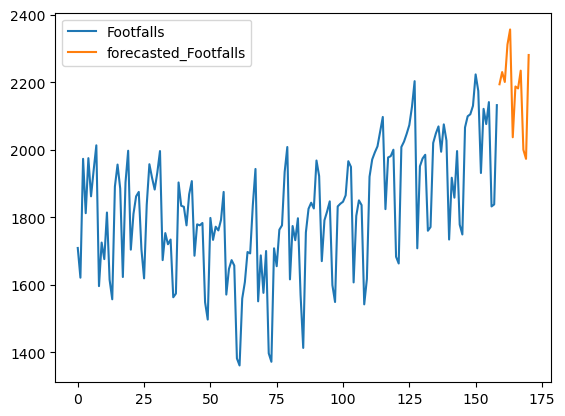

In [44]:
new_var[['Footfalls','forecasted_Footfalls']].reset_index(drop=True).plot()
